# Sentiment Analysis for Soccer Games (EPL) using Twitter
Author: Dixon Liang

#### Note: This file is an empty demo for anyone's use, for the demo that corresponds with the video tutorial, please use the file "12_5_20_ChelseaLeeds_Demo.ipynb" 

Hi, welcome to my implementation of sentiment analysis of soccer games using Python, Tweepy, TextBlob, and BM25Okapi. This project was for the class CS 410 (Text Information Systems) at the University of Illinois Urbana Champaign as part of my Masters in Computer Science curriculum. However, I would like to share it with anyone who might be interested in it. 

We will be using Tweepy to source tweets from the Twitter API and TextBlob to provide a framework for natural language processing to provide sentiment analysis. In addition, we will use PyPi's implementation of BM25Okapi to provide context of the sentiment analysis. 

Ideally, the result of this code will show the relative sentiment of a player's performance during a recent game. By using wisdom of the crowds, we hope to gain an idea of how the player performed. Using BM25Okapi, we will also be able to use relevant terms to see what might have caused sentiment to go way or another (ex. player scored a goal or provided an assist, etc.) Using PyPlot, we will also be able to visualize the results. 

This notebook will provide a run through of how the code works with the main code in my Github, providing relevant output which may be useful for anyone interested. The source code is available at my Github (https://github.com/dixonliang). Technically, this code can be used for any soccer game, but given the popularity and language barrier, EPL games are likely to provide the most meaningful results. Adjustments could be made for La Liga or Serie A using Spanish or Italian NLP. Please feel free to reach out as I welcome any collaboration as the code can be improved and applied to different sports or different applications all together :) . 


## Packages Needed: 

The two cells below provide area to install the necessary packages and import them.

We will need: Tweepy, TextBlob, Numpy, Rank_BM25, and Matplotlib.pyplot

http://docs.tweepy.org/en/latest/api.html
https://textblob.readthedocs.io/en/dev/api_reference.html
https://numpy.org/doc/
https://pypi.org/project/rank-bm25/
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html
    
Because we are using Twitter, we will also need access to Twitter's API. This can be gained by using a Twitter profile and requesting access for the API. A link for how to do this is provided here (http://docs.tweepy.org/en/latest/auth_tutorial.html). You will be provided four keys of strings of letters and numbers which you will need to enter in the box below: consumer key, consumer secret, access token, access token secret. 

In [1]:
# install any packages here

# pip install tweepy
%pip install praw textblob rank_bm25

You should consider upgrading via the '/Users/tudor/.pyenv/versions/3.9.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary packages here

import praw
from textblob import TextBlob # import textblob
import numpy as np # import numpy
from rank_bm25 import BM25Okapi # import BM25
import matplotlib.pyplot as plt # import plotting
plt.ion()

client_id = '<SECRET>'
client_secret = '<SECRET>'

reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent='Mozilla/5.0 (Linux; Android 13; RMX2202 Build/TP1A.220905.001; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/111.0.5563.116 Mobile Safari/537.36 [FB_IAB/FB4A;FBAV/410.0.0.26.115;]')
print(reddit.read_only)


True


## Setting Game Parameters

Below is where we will set the game we are interested in. The main variables to set here are the team names we are interested in searching for. Given there may be multiple names used for teams, the best choice would be for the most commonly references. The 11 starting players for each team will also need to be listed; similarily, we should use the most commonly used names for the player if they can be referred to as different names. 

Ex. team1 = "Chelsea" 

team2 = "Spurs" 

team1_Player1 = "Pulisic"

team1_Player2 = "Werner"

team1_Player3 = "Kovacic" 

... 

team2_Player1 = "Kane"

team2_Player2 = "Son"

team2_Player3 = "Aurier"

Note: Unless you have enterprise access to the Twitter API, only games within the last seven days can be accessed. The free version of the Twitter API only provides tweets within the last seven days. 

In [3]:
team1 = "Chelsea"
team2 = "Manchester City"

#team1
team1_Player1 = "Kepa"
team1_Player2 = "Fofana"
team1_Player3 = "Silva"
team1_Player4 = "Chalobah"
team1_Player5 = "Hall"
team1_Player6 = "Fernandez"
team1_Player7 = "Azpilicueta"
team1_Player8 = "Loftus-Cheek"
team1_Player9 = "Havertz"
team1_Player10 = "Sterling"
team1_Player11 = "Gallagher"

#team2
team2_Player1 = "Ederson"
team2_Player2 = "Walker"
team2_Player3 = "Dias"
team2_Player4 = "Laporte"
team2_Player5 = "Akanji"
team2_Player6 = "Rodri"
team2_Player7 = "Gundogan"
team2_Player8 = "Foden"
team2_Player9 = "Mahrez"
team2_Player10 = "Alvarez"
team2_Player11 = "De Bruyne"

total_players = 11

team1_player_array = [team1_Player1, team1_Player2, team1_Player3, team1_Player4, team1_Player5, team1_Player6, team1_Player7,
team1_Player8, team1_Player9, team1_Player10, team1_Player11] # player array for Team 1

team2_player_array = [team2_Player1, team2_Player2, team2_Player3, team2_Player4, team2_Player5, team2_Player6, team2_Player7,
team2_Player8, team2_Player9, team2_Player10, team2_Player11] # player array for Team 2

team1_player_sentiment = [] # place holder array for players senitment scores
team1_player_tweets = [] # place holder for the tweets for each player
team1_player_combined = [] # place holder for the tweets for each player and sentiment

team2_player_sentiment = [] # place holder array for players senitment scores
team2_player_tweets = [] # place holder for the tweets for each player that match threshold
team2_player_combined = [] # place holder for the tweets for each player and sentiment

In [4]:
# team1 = "Arsenal"
# team2 = "Manchester United"

# #team1
# team1_Player1 = "Ramsdale"
# team1_Player2 = "White"
# team1_Player3 = "Saliba"
# team1_Player4 = "Gabriel"
# team1_Player5 = "Zinchenko"
# team1_Player6 = "Odegaard"
# team1_Player7 = "Partey"
# team1_Player8 = "Xhaka"
# team1_Player9 = "Saka"
# team1_Player10 = "Nketiah"
# team1_Player11 = "Martinelli"

# #team2
# team2_Player1 = "de Gea"
# team2_Player2 = "Wan-bissaka"
# team2_Player3 = "Varane"
# team2_Player4 = "Martinez"
# team2_Player5 = "Shaw"
# team2_Player6 = "Eriksen"
# team2_Player7 = "McTominay"
# team2_Player8 = "Antony"
# team2_Player9 = "Fernandes"
# team2_Player10 = "Rashford"
# team2_Player11 = "Weghorst"

# total_players = 11

# team1_player_array = [team1_Player1, team1_Player2, team1_Player3, team1_Player4, team1_Player5, team1_Player6, team1_Player7,
# team1_Player8, team1_Player9, team1_Player10, team1_Player11] # player array for Team 1

# team2_player_array = [team2_Player1, team2_Player2, team2_Player3, team2_Player4, team2_Player5, team2_Player6, team2_Player7,
# team2_Player8, team2_Player9, team2_Player10, team2_Player11] # player array for Team 2

# team1_player_sentiment = [] # place holder array for players senitment scores
# team1_player_tweets = [] # place holder for the tweets for each player
# team1_player_combined = [] # place holder for the tweets for each player and sentiment

# team2_player_sentiment = [] # place holder array for players senitment scores
# team2_player_tweets = [] # place holder for the tweets for each player that match threshold
# team2_player_combined = [] # place holder for the tweets for each player and sentiment

## Algorithm Parameters 

We will now need to set the parameters specific to the game we are interested in. We will need to set the number of tweets that we are interested in retrieving for each player. A threshold for the subjectivity of a tweet will need to be set too which will determine which tweets are used for our analysis (range from 0 to 1, with 0 being objective and 1 being subjective). Given the analysis, it's probably reasonable to allow for even the slightest subjectivity in a tweet to give us the most data to work with. 

We will also need to provide the dates from which our tweets will be sourced from. Ideally, it is best to use the day of and the day after the game. Date is to be provided in the following format "YYYY-MM-DD". 

In [5]:
### define the number of tweets we want to sort for and subjective threshold

number_of_tweets = 50 # how many tweets we want to search for
threshold = 0.10 # threshold for subjectivity [0,1]

### setting date range, ideally run day after the game

date_since = "2023-05-17"
date_until = "2023-05-19"

import time, datetime
time_since = time.mktime(datetime.datetime.strptime(date_since, "%Y-%m-%d").timetuple())
time_until = time.mktime(datetime.datetime.strptime(date_until, "%Y-%m-%d").timetuple())
time_since, time_until

(1684270800.0, 1684443600.0)

In [6]:
# for element in reddit.subreddit('soccer').search('Premier League'):
    # print(element.created_utc)
    # if time_since <= element.created_utc <= time_until:
        # print(element.title, element.score, element.created_utc)

%pip install pmaw
from pmaw import PushshiftAPI
api = PushshiftAPI(praw=reddit)

You should consider upgrading via the '/Users/tudor/.pyenv/versions/3.9.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Running through the algorithm for each team 

The below cells will run through each team, retrieving the number of tweets set for each player and placing them into arrays with their relative sentiment from TextBlob. 

There are also some helper functions above the loops that will be used for later on. 

In [7]:
### code to sort by sentiment rating

def sentiment_element(element): # define sorting function
    return element[1]

### display the top 10 min and max sentiment tweets for a player based on team

def display_tweets(team, player_number):
    if (team == team1):
        print(team1_player_combined[player_number-1][0:9], "negative") # negative sentiment
        print(team1_player_combined[player_number-1][number_of_tweets-11:number_of_tweets-1], "positive") # positive sentiment
    else:
        print(team2_player_combined[player_number-1][0:9], "negative") # negative sentiment
        print(team2_player_combined[player_number-1][number_of_tweets-11:number_of_tweets-1], "positive") # positive sentiment
        
### PART1: Basic Sentiment Analysis without any adjustments

### Loop for Team 1 to find sentiment


for i in team1_player_array: # loop through each player
    search_words = [i, team1] # search array for each player
    reddits = reddit.subreddit('soccer').search(search_words, limit=number_of_tweets) # search for the player and team
    tweet_array = []
    sentiment_array = []
    combined_array = []

    for r in reddits:
        tweet_array.append(r.title)
        sentiment_array.append(TextBlob(r.title).sentiment) # append the sentiment into array

    for j in range(0,len(tweet_array)): # create combined array to sort
        combined_array.append([tweet_array[j],sentiment_array[j][0]])

    combined_array.sort(key=sentiment_element)  # sort tweet array by sentiment (remember that lowest sentiment is first)

    team1_player_tweets.append(tweet_array) # create array of just the tweets
    team1_player_combined.append(combined_array) # create array of all of the respective player tweets, which are now sorted by sentiment

    sentiment_count = 0 # want to only count sentiments that are subjective
    sentiment_total = 0 # keep track for average
    for sentiment in sentiment_array:
        if (sentiment[1] >= threshold): # set threshold for objectivity, 0 = objective, 1 = subjective
            sentiment_count = sentiment_count + 1
            sentiment_total = sentiment_total + sentiment[0]

    if (sentiment_total == 0):
        team1_player_sentiment.append([i,0,sentiment_count]) # handle 0 count
    else:
        team1_player_sentiment.append([i,sentiment_total/sentiment_count,sentiment_count])


### Loop for Team 2 to find sentiment

for i in team2_player_array: # loop through each player
    search_words = [i, team2] # search array for each player
    reddits = reddit.subreddit('soccer').search(search_words, limit=number_of_tweets) # search for the player and team
    tweet_array = []
    sentiment_array = []
    combined_array = []

    for r in reddits:
        tweet_array.append(r.title)
        sentiment_array.append(TextBlob(r.title).sentiment) # append the sentiment into array

    for j in range(0,len(tweet_array)): # create combined array to sort
        combined_array.append([tweet_array[j],sentiment_array[j][0]])

    combined_array.sort(key=sentiment_element)  # sort tweet array by sentiment (remember that lowest sentiment is first)

    team2_player_tweets.append(tweet_array) # create array of just the tweets
    team2_player_combined.append(combined_array) # create array of all of the respective player tweets, which are now sorted by sentiment

    sentiment_count = 0 # want to only count sentiments that are subjective
    sentiment_total = 0 # keep track for average
    for sentiment in sentiment_array:
        if (sentiment[1] >= threshold): # set threshold for objectivity
            sentiment_count = sentiment_count + 1
            sentiment_total = sentiment_total + sentiment[0]


    if (sentiment_total == 0):
        team2_player_sentiment.append([i,0,sentiment_count]) # handle 0 count
    else:
        team2_player_sentiment.append([i,sentiment_total/sentiment_count,sentiment_count])


## Plotting the Results and Displaying Sentiment Tweets

The below cells will graph the results in the form of a horizontal bar chart to give visualization of the sentiment. The following cell will display any tweets that the user might be interested in for a specific player. 

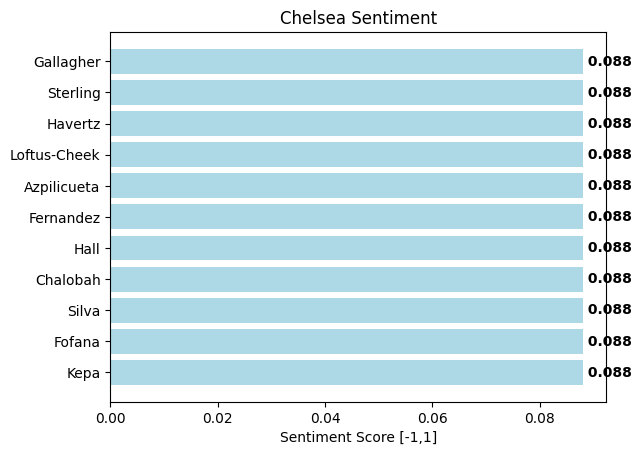

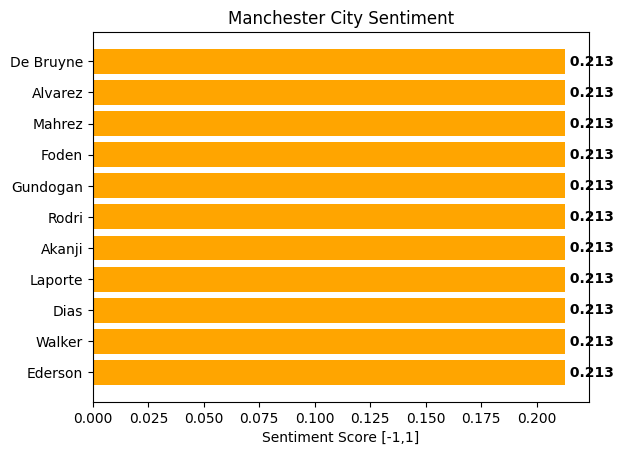

In [8]:
### sort each senitment array and organize for plotting

team1_player_sentiment.sort(key=sentiment_element)
team2_player_sentiment.sort(key=sentiment_element)

# create index for team 1
team1_Index = []
team1_Sentiment = []
for i in team1_player_sentiment:
    team1_Index.append(i[0])
    team1_Sentiment.append(round(i[1],3))

# create index for team 2
team2_Index = []
team2_Sentiment = []
for i in team2_player_sentiment:
    team2_Index.append(i[0])
    team2_Sentiment.append(round(i[1],3))


### create bar graphs for Part 1 displaying data and then save down

def plot_bar_team1_sentiment():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_Sentiment, color = "lightblue")
    plt.title(team1 + ' Sentiment')
    plt.xlabel('Sentiment Score [-1,1]')
    for i, v in enumerate(team1_Sentiment):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team1_sentiment.png')

plot_bar_team1_sentiment()

def plot_bar_team2_sentiment():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_Sentiment, color = "orange")
    plt.title(team2 + ' Sentiment')
    plt.xlabel('Sentiment Score [-1,1]')
    for i, v in enumerate(team2_Sentiment):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team2_sentiment.png')

plot_bar_team2_sentiment()

In [9]:
### display tweets for players interested in
## enter the team name as a string for the first argument, then the player number that you are intersted in
## will display the top 10 negative tweets and then the top 10 positive tweets

# team 1

display_tweets("",2)
display_tweets("",3)

# team 2

display_tweets("",3)
display_tweets("",8)

[['Match Thread: Manchester City vs Chelsea', 0.0], ['Match Thread: Everton vs Manchester City | English Premier League', 0.0], ["[Official] This year's Champions League Final will be Manchester City vs Inter Milan", 0.0], ['Match Thread: Manchester City vs Arsenal | English Premier League', 0.0], ['[Telegraph] Jamie Carragher: Abu Dhabi billions transformed Manchester City but Pep Guardiola has made them unbeatable', 0.0], ['Post Match Thread: Manchester City 4-1 Arsenal | English Premier League', 0.0], ['Match Thread: Bayern Munich vs. Manchester City [UEFA Champions League - Quarter-Finals | 2nd Leg]', 0.0], ['Luka Modric touch vs. Manchester City', 0.0], ["Manchester City [1] - 0 Chelsea - Julian Alvarez 12'", 0.0]] negative
[['Post Match Thread: Real Madrid 1 - 1 Manchester City - [UEFA Champions League - Semifinals | 1st Leg]', 0.2], ['Real Madrid 1 - [1] Manchester City - Kevin De Bruyne 67’', 0.2], ['Match Thread: Manchester City vs Real Madrid | UEFA Champions League Semi-Fina

# Using BM25Okapi for Context

One of the most popular NLP search algorithms, which remains state of the art is BM25Okapi. BM25Okapi is a ranking function which will query based on search terms. The most relevant "documents" or in this case tweets will be given a higher score. 

What I have done is provided a space for a postive terms and negative terms query in relation to a soccer game. Sample queries are provided below which I think may represent positive or negative terms. By doing this, we can see which players have a higher ranking for positive terms or negative terms which can give context to why they might have been given the sentiment score that they were given above. 

BM25 incorporates search ranking concepts such as IDF (inverse document frequency), which is a filter for commonly used terms as well as TF (term frequency), which gives higher ranking for more matching of terms. A brief summary of how exactly the formula ranks can be found here: https://nlp.stanford.edu/IR-book/html/htmledition/okapi-bm25-a-non-binary-model-1.html

In [10]:
### implementiation for specific terms relating to the game, ranking for BM25Okapi

positive_terms = "assist good excellent great recovery amazing fantastic" # search queries, positive terms
negative_terms = "poor bad miss own awful dissapointment loss " # negative terms

## Running the BM25Okapi Algorithm 

Below is the main code for running the algorithm with associated bar graphs displaying positive and negative term results. The following cells provide an area to display the top ranked tweets based on these terms. 

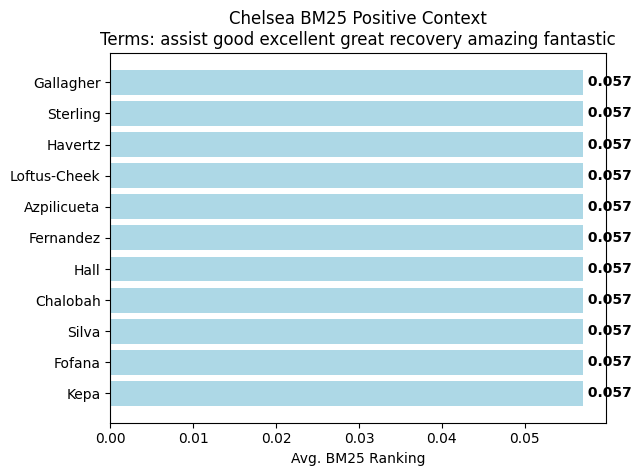

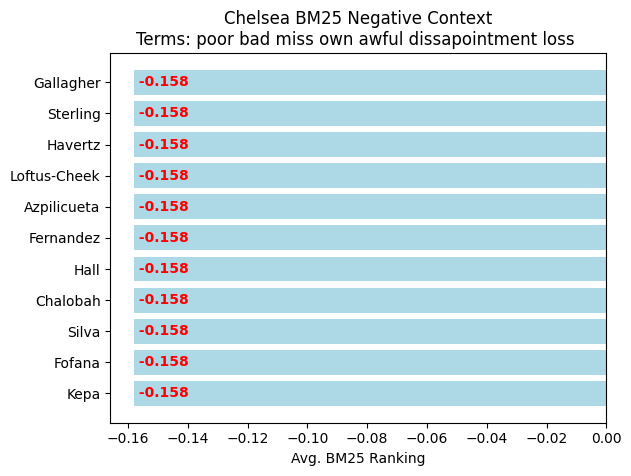

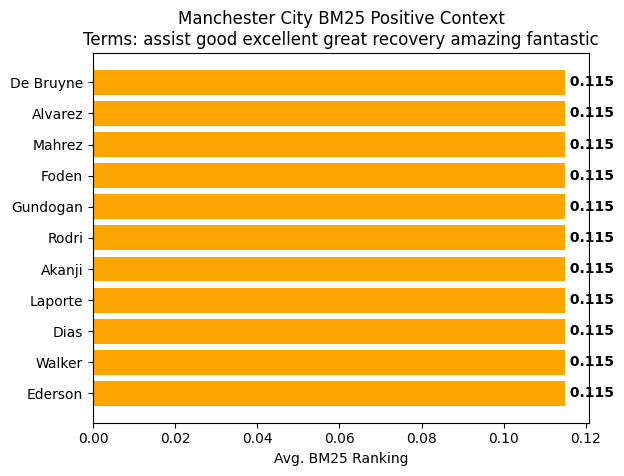

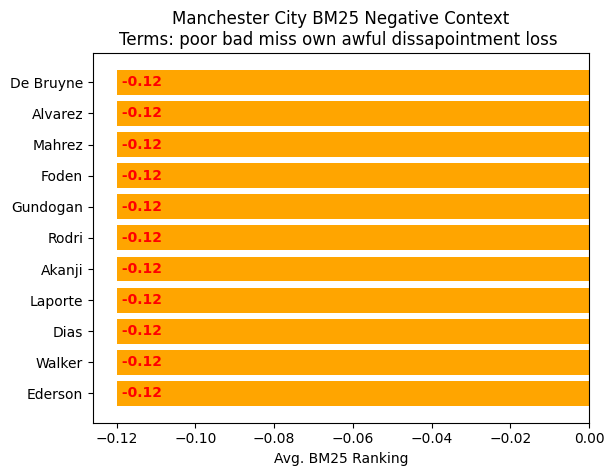

In [11]:
### implementation of BM25Okapi to rank relevant of tweets in relation the game

def rank_scores(corpus, terms): # give each tweet a score based on query
    bm25 = BM25Okapi(corpus)
    tweet_scores = bm25.get_scores(terms)
    return tweet_scores

def rank_top(corpus, terms): # show the top 10 based on query
    bm25 = BM25Okapi(corpus)
    top_10_tweets = bm25.get_top_n(terms, corpus, n=10)
    return top_10_tweets


### sentiment in relation to using BM25 as context

team1_total_tweets = []
team2_total_tweets = []
team1_positive_results = []
team2_positive_results = []
team1_negative_results = []
team2_negative_results = []

for i in range(0,len(team1_player_tweets)):
    team1_total_tweets = team1_total_tweets + team1_player_tweets[i] # combine all player tweets into one corpus
    team2_total_tweets = team2_total_tweets + team2_player_tweets[i]
total_tweets = team1_total_tweets + team2_total_tweets # combine both player tweets into one corpus
tokenized_tweets = [doc.split(" ") for doc in total_tweets] # tokenize the tweets for function

tokenized_query_positive = positive_terms.split(" ")
tokenized_query_negative = negative_terms.split(" ")

# positive array
positive_array = rank_scores(tokenized_tweets,tokenized_query_positive)
team1_positive_array = positive_array[0:number_of_tweets*total_players] # break into positive array for the two teams for sum
team2_positive_array = positive_array[number_of_tweets*total_players:len(positive_array)]

# negative array
negative_array = rank_scores(tokenized_tweets,tokenized_query_negative)
team1_negative_array = negative_array[0:number_of_tweets*total_players] # break into positive array for the two teams for sum
team2_negative_array = negative_array[number_of_tweets*total_players:len(negative_array)]

# postive tweets
team1_positive_results = np.sum(np.reshape(team1_positive_array,(total_players,number_of_tweets)),axis=1) / number_of_tweets
team2_positive_results = np.sum(np.reshape(team2_positive_array,(total_players,number_of_tweets)),axis=1) / number_of_tweets

# negative tweets
team1_negative_results = np.sum(np.reshape(team1_negative_array,(total_players,number_of_tweets)),axis=1) / -number_of_tweets
team2_negative_results = np.sum(np.reshape(team2_negative_array,(total_players,number_of_tweets)),axis=1) / -number_of_tweets

### create bar graphs for Part 2 displaying data and then save down


# reshape sum arrays for graphing

team1_positive_results = np.round(np.reshape(team1_positive_results,(1,total_players)).tolist(),3)
team2_positive_results = np.round(np.reshape(team2_positive_results,(1,total_players)).tolist(),3)
team1_negative_results = np.round(np.reshape(team1_negative_results,(1,total_players)).tolist(),3)
team2_negative_results = np.round(np.reshape(team2_negative_results,(1,total_players)).tolist(),3)


# team 1 BM25 charts

def plot_bar_team1_BM25positive():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_positive_results[0], color = "lightblue")
    plt.title(team1 + ' BM25 Positive Context' + '\n' + "Terms: " + positive_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team1_positive_results[0]):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team1_BM25positive.png')

plot_bar_team1_BM25positive()

def plot_bar_team1_BM25negative():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_negative_results[0], color = "lightblue")
    plt.title(team1 + ' BM25 Negative Context' + '\n' + "Terms: " + negative_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team1_negative_results[0]):
        ax.text(v, i, " " + str(v), color='red', va = 'center', fontweight='bold')
    plt.savefig('team1_BM25negative.png')

plot_bar_team1_BM25negative()


# team 2 BM25 charts

def plot_bar_team2_BM25positive():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_positive_results[0], color = "orange")
    plt.title(team2 + ' BM25 Positive Context' + '\n' + "Terms: " + positive_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team2_positive_results[0]):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team2_BM25positive.png')

plot_bar_team2_BM25positive()

def plot_bar_team2_BM25negative():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_negative_results[0], color = "orange")
    plt.title(team2 + ' BM25 Negative Context' + '\n' + "Terms: " + negative_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team2_negative_results[0]):
        ax.text(v, i, " " + str(v), color='red', va = 'center', fontweight='bold')
    plt.savefig('team2_BM25negative.png')

plot_bar_team2_BM25negative()

In [12]:
team2_total_tweets

['Match Thread: Manchester City vs. Real Madrid | UEFA Champions League',
 'Match Thread: Real Madrid vs Manchester City - [UEFA Champions League - Semifinals | 1st Leg]',
 'Post Match Thread: Manchester City 4–0 Real Madrid (5–1 agg.) | UEFA Champions League',
 '[Manchester City] are Premier League champions for the third straight season',
 'Match Thread: Manchester City vs Chelsea',
 'Match Thread: Everton vs Manchester City | English Premier League',
 '[The Times] Manchester City have lodged legal challenges against the Premier League’s 115 charges for alleged rule breaches, disputing the involvement of the barrister who is in charge of the disciplinary process because he is an Arsenal fan',
 'Post Match Thread: Real Madrid 1 - 1 Manchester City - [UEFA Champions League - Semifinals | 1st Leg]',
 '[Miguel Delaney] Five titles in six years: Are Manchester City destroying the Premier League? Pep Guardiola has been given limitless funds to create the perfect team in laboratory conditio

In [13]:
### display the top search tweets for each sentiment for each team

print(rank_top(team1_total_tweets,positive_terms)) # search for top positive tweets for team 1
print(rank_top(team1_total_tweets,negative_terms)) # search for top negative tweets for team 1
print(rank_top(team2_total_tweets,positive_terms)) # search for top positive tweets for team 2
print(rank_top(team2_total_tweets,negative_terms)) # search for top negative tweets for team 2

['[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella', '[Nizaar Kinsella] Chelsea in Joao Felix swap deal talks as Atletico eye Aubameyang and Cucurella']

# Conclusion 

This code gives a basic framework of senitment analysis for soccer games. Using Tweepy and TextBlob, we can get a basic idea of the player performance during the game of interest. BM25Okapi provides further context as to what may have contributed to these scores. For the most part, this code gives the user a basic idea of which players peformed well or poorly during a game in public opinion. Through extended use over a series of games or even a season, we can get a better idea of which players are in good or poor form. It would be a good tool to use in combination with game statistic analysis to determine player performance and player value. 

### Potential Improvements

The code can be further improved in terms of cleaniness and efficiency. More features can be added to as well as implementation for deeper NLP for better classification of sentiment. 

There can also be other applications of this code. The most notable being adapted to other sports; all that would be needed to be done is an adjustment of some of the variables to make sense for a specific sport. The BM25Okapi algorithm terms can be adjusted for terms that are relevant in a positive or negative context for that specific sport. 